In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Load the data
file_path = '/Users/sarithavuppula/Downloads/Summer School/final_version_data.csv'
df = pd.read_csv(file_path)
df = df.iloc[:, 1:]  # Remove the unnecessary index column


In [3]:
# Function to extract features
def extract_features(df):
    colnames = ['cycle', 'condition', 'mode', 'pin_mean', 'po_mean', 'pdmp_mean',
                'pin_var', 'po_var', 'pdmp_var', 'pin_kurtosis', 'po_kurtosis', 'pdmp_kurtosis']
    features = np.empty((0, len(colnames)))

    for condition in df['condition'].unique():
        condition_df = df[df.condition == condition]
        for mode in condition_df['mode'].unique():
            mode_df = condition_df[condition_df['mode'] == mode]
            for cycle in mode_df['cycle'].unique():    
                cycle_df = mode_df[mode_df.cycle == cycle]
                mean_vals = np.mean(cycle_df[['pin', 'po', 'pdmp']], axis=0).tolist()
                variance_vals = np.var(cycle_df[['pin', 'po', 'pdmp']], axis=0).tolist()
                kurtosis_vals = kurtosis(cycle_df[['pin', 'po', 'pdmp']]).tolist()
                meta_data = [np.unique(cycle_df['cycle'])[0], np.unique(cycle_df['condition'])[0], np.unique(cycle_df['mode'])[0]]
                
                feature = np.array(meta_data + mean_vals + variance_vals + kurtosis_vals).reshape(1, -1)
                features = np.concatenate([features, feature], axis=0)

    return pd.DataFrame(features, columns=colnames)

In [4]:
# Extract features for all data
features = extract_features(df)

# Save extracted features to CSV
output_file = '/Users/sarithavuppula/Downloads/Summer School/extracted_features.csv'
features.to_csv(output_file, index=None)


KeyboardInterrupt: 

In [6]:
# Function to plot data patterns
def plot_comparison(data1, data2, title1, title2):
    if data1.empty:
        print(f"No data available for {title1}")
    if data2.empty:
        print(f"No data available for {title2}")

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(data1.index, data1['pin'], label='PIN', alpha=0.6)
    plt.plot(data1.index, data1['po'], label='PO', alpha=0.6)
    plt.plot(data1.index, data1['pdmp'], label='PDMP', alpha=0.6)
    plt.title(title1)
    plt.xlabel('Time')
    plt.ylabel('Sensor Reading')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(data2.index, data2['pin'], label='PIN', alpha=0.6)
    plt.plot(data2.index, data2['po'], label='PO', alpha=0.6)
    plt.plot(data2.index, data2['pdmp'], label='PDMP', alpha=0.6)
    plt.title(title2)
    plt.xlabel('Time')
    plt.ylabel('Sensor Reading')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


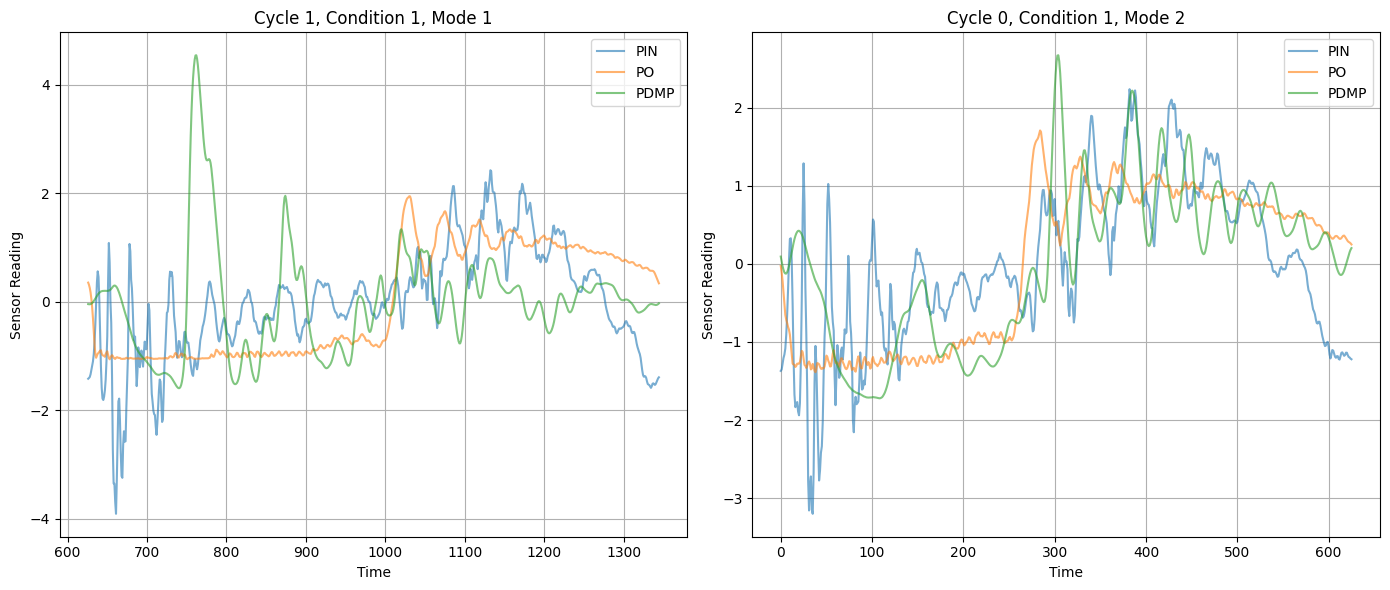

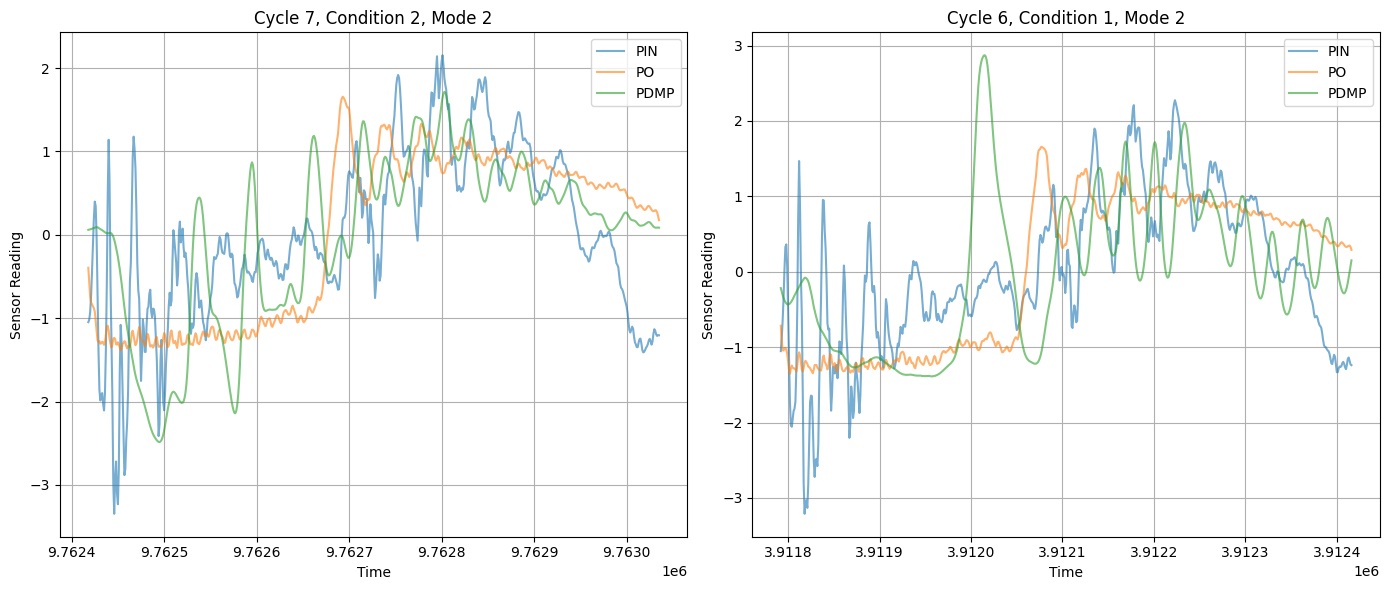

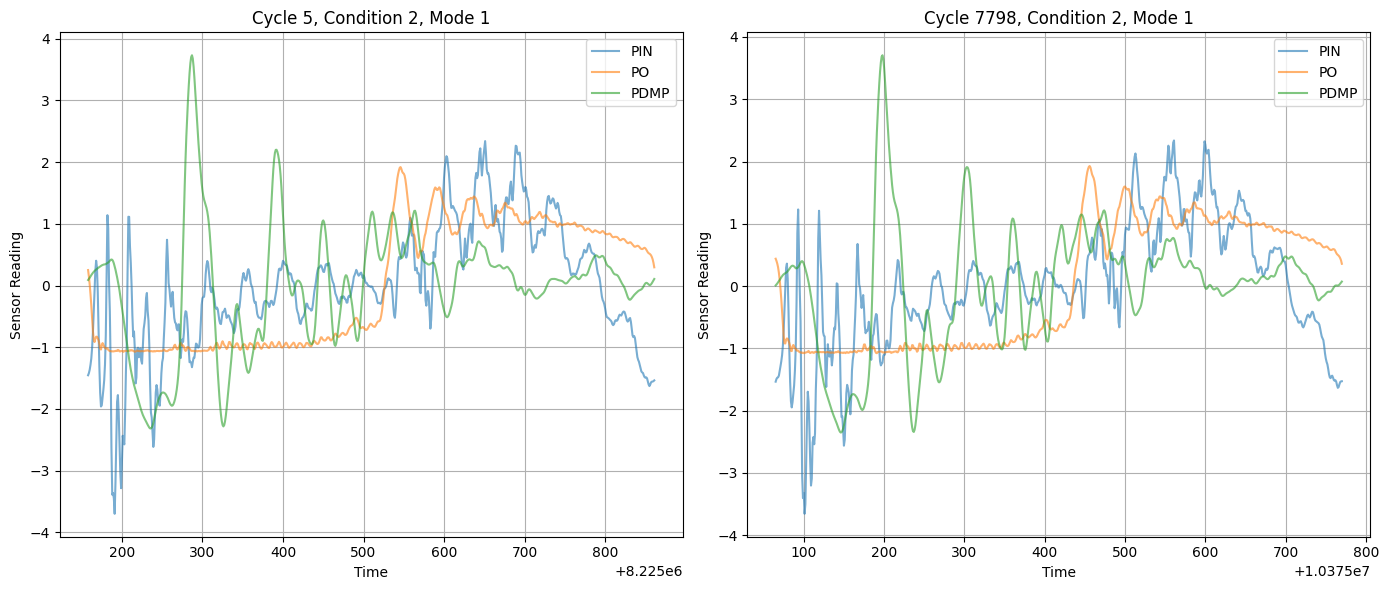

In [11]:
# Comparison of data patterns according to failure modes
mode1_cycle1_cond1 = df[(df['cycle'] == 1) & (df['condition'] == 1) & (df['mode'] == 1)]
mode2_cycle0_cond2 = df[(df['cycle'] == 0) & (df['condition'] == 1) & (df['mode'] == 2)]
plot_comparison(mode1_cycle1_cond1, mode2_cycle0_cond2, 'Cycle 1, Condition 1, Mode 1', 'Cycle 0, Condition 1, Mode 2')

# Comparison of data patterns according to operational conditions
cond2_cycle7_mode2 = df[(df['cycle'] == 7) & (df['condition'] == 2) & (df['mode'] == 2)]
cond1_cycle6_mode2 = df[(df['cycle'] == 6) & (df['condition'] == 1) & (df['mode'] == 2)]
plot_comparison(cond2_cycle7_mode2, cond1_cycle6_mode2, 'Cycle 7, Condition 2, Mode 2', 'Cycle 6, Condition 1, Mode 2')

# Comparison of data patterns over time
front_cycle5_cond2_mode1 = df[(df['cycle'] == 5) & (df['condition'] == 2) & (df['mode'] == 1)]
back_cycle7798_cond2_mode1 = df[(df['cycle'] == 7798) & (df['condition'] == 2) & (df['mode'] == 1)]
plot_comparison(front_cycle5_cond2_mode1, back_cycle7798_cond2_mode1, 'Cycle 5, Condition 2, Mode 1', 'Cycle 7798, Condition 2, Mode 1')